**- How many tweets per sentiment and airline?**

Importing libraries

In [1]:
import pandas as pd
import plotly.express as px 

In [2]:
tweetdata = pd.read_csv('Tweets.csv')

In [3]:
tweet = tweetdata.groupby(['airline_sentiment','airline']).size().to_frame()
cleanedtweet = tweet.reset_index()
cleanedtweet.columns = ['airline_sentiment','airline','value']
cleanedtweet[0:5]

airline_sentiment     airline  value
0          negative    American   1960
1          negative       Delta    955
2          negative   Southwest   1186
3          negative  US Airways   2263
4          negative      United   2633

In [4]:
fig = px.bar(cleanedtweet, x="airline", y="value", color="airline_sentiment", 
            hover_data=['value'], barmode = 'stack',title = 'Stacked bar graph showing number of tweets per sentiment and airline') 
  
fig.show()

**Interpretation:-** The stacked bar graph shows the number of tweets per sentiment and airline. In the graph, 
1. United Airlines has the highest number of tweets with negative sentiment. 
2. Southwest airline has the highest number of tweets with positive sentiment.
3. Delta has the highest number of tweets with neutral sentiments
4. Virgin America airline has the lowest number of tweets per sentiment and airline.

**- What are the most common causes of dissatisfaction in each company?**

In [5]:
def dissatis_Company(Airline):
    dissatis = tweetdata.groupby(['airline','negativereason']).size().to_frame()
    dissatisfactory = dissatis.reset_index()
    dissatisfactory.columns = ['airline','negativereason','value']
    Airlines = dissatisfactory[dissatisfactory['airline'] == Airline]
    return Airlines

In [6]:
import plotly.offline as pyo

def plot_piechart(Airlines,Name):
        Airline = Name
        fig = {'data' : [{'type' : 'pie',
                          'name' : "Students by level of study",
                         'labels' : Airlines['negativereason'],
                         'values' : Airlines['value']}],
              'layout' : {'title' : 'Most common causes of dissatisfaction for '+Airline+' Company'}}

        fig['data'][0].update({'text' : Airlines['negativereason'],
                              'textinfo' : 'label+text+percent'})

        fig['data'][0].update({'textinfo' : 'text+percent',
                              'showlegend' : False})
        pyo.iplot(fig)

In [7]:
American = dissatis_Company('American')
plot_piechart(American,'American')
Delta = dissatis_Company('Delta')
plot_piechart(Delta,'Delta')
Southwest = dissatis_Company('Southwest')
plot_piechart(Southwest,'Southwest')
Southwest = dissatis_Company('Southwest')
plot_piechart(Southwest,'Southwest')
USAirways = dissatis_Company('US Airways')
plot_piechart(USAirways,'US Airways')
United = dissatis_Company('United')
plot_piechart(United,'United')
ViginAmerica = dissatis_Company('Virgin America')
plot_piechart(ViginAmerica,'Virgin America')

**Interpretation:-** From the pie-charts, we can see that

1) 'Customer Service Issue' is the most common cause of dissatisfaction for all companies except for delta.

2) For delta, the 'late flight' is the most common cause of dissatisfaction.

**- For each airline company, what are the most frequent words in negative sentiments?**

In [8]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

def WordCloud_Airline(airline):
    NegSentiment = tweetdata[tweetdata['airline_sentiment'] == 'negative']
    NegSentiment = NegSentiment[NegSentiment['airline']== airline]
    words = ''
    stopwords = set(STOPWORDS) 
    for text in NegSentiment['text']:
        text = str(text)
        tokens = text.split()
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 
        words += " ".join(tokens)+" "
    wordcloud = WordCloud(width = 1000, height = 800, 
                background_color ='black', 
                min_font_size = 15
                , colormap='Set2', collocations=False, 
                stopwords = stopwords,max_words = 200).generate(words) 
    return wordcloud

In [9]:
def plot_WordCloud(wordcloud):                       
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show() 

### US Airways

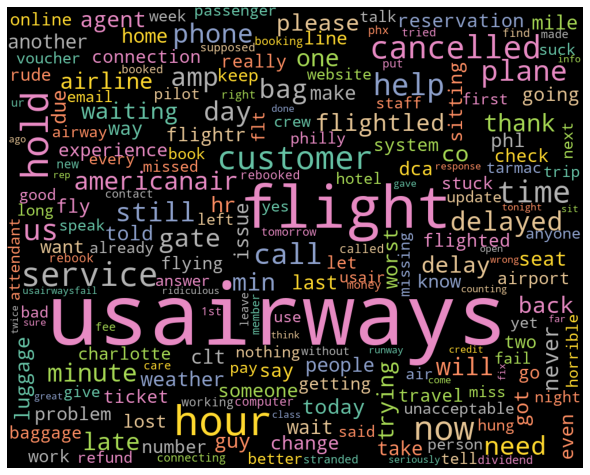

In [10]:
US_Airlines = WordCloud_Airline('US Airways')
plot_WordCloud(US_Airlines)

**Interpretation**:- From the word cloud, we can see all the relevent words used for US airways for negative sentiments. The most frequent words are flight,cancelled, hold,customer and so on.

## American

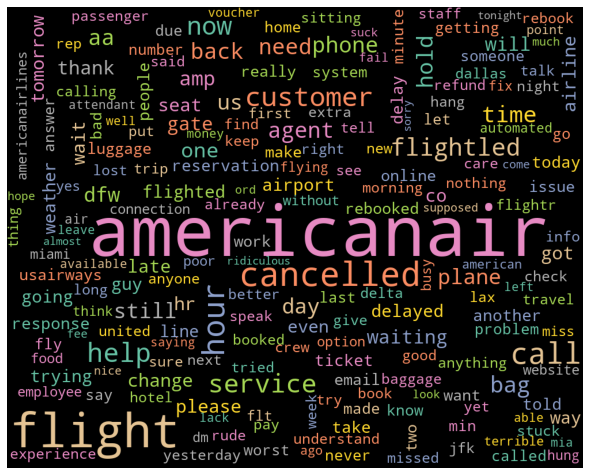

In [11]:
American = WordCloud_Airline('American')
plot_WordCloud(American)

**Interpretation**:- From the word cloud, we can see all the relevent words used for American airlines for negative sentiments. The most frequent words are flight,cancelled, call and so on.

## Southwest

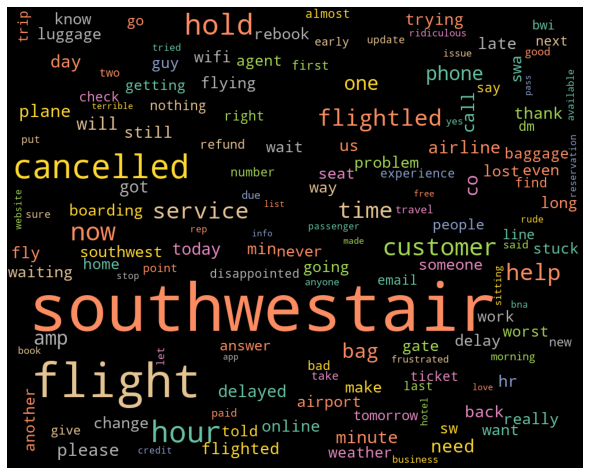

In [12]:
Southwest = WordCloud_Airline('Southwest')
plot_WordCloud(Southwest)

**Interpretation:-** From the word cloud, we can see all the relevent words used for Southwest airlines for negative sentiments. The most frequent words are hold,cancelled, flight,cancelled and so on.

## Delta

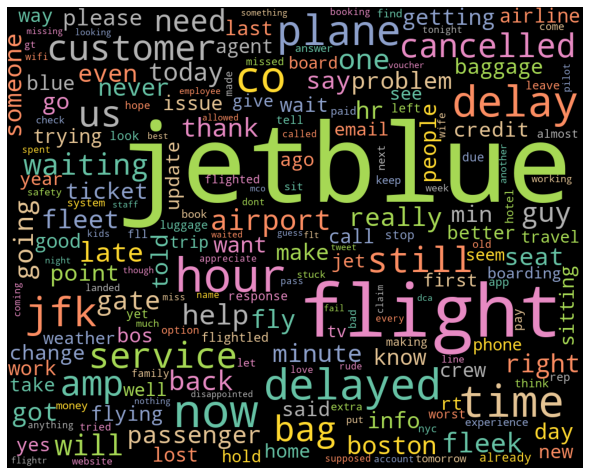

In [13]:
Delta = WordCloud_Airline('Delta')
plot_WordCloud(Delta)

**Interpretation:-** From the word cloud, we can see all the relevent words used for Delta airlines for negative sentiments. The most frequent words are delayed, time,cancelled, flight,cancelled and so on.

# United

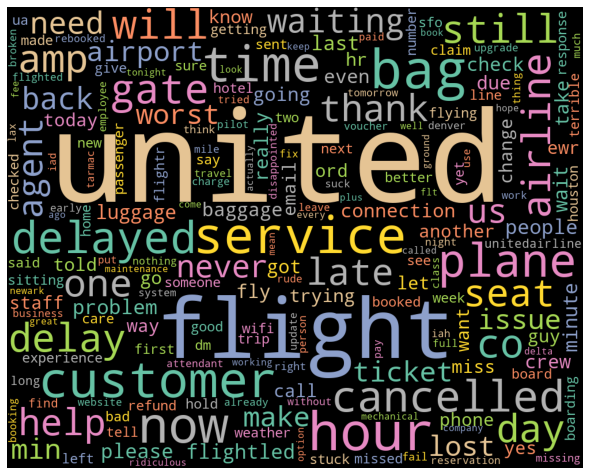

In [14]:
United = WordCloud_Airline('United')
plot_WordCloud(United)

**Interpretation:-** From the word cloud, we can see all the relevent words used for United airlines for negative sentiments. The most frequent words are service,customer,airline and so on.

## Virgin America

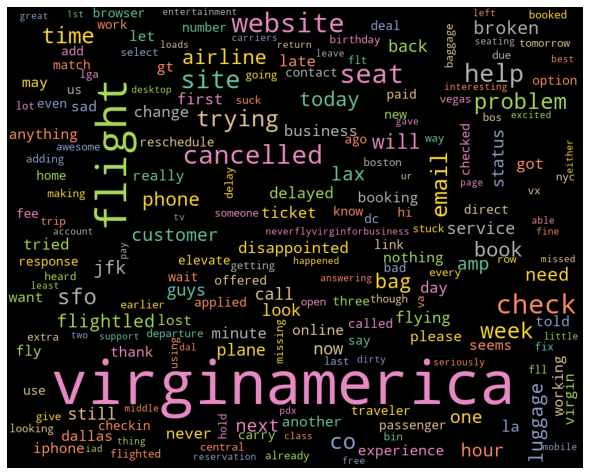

In [15]:
Virgin = WordCloud_Airline('Virgin America')
plot_WordCloud(Virgin)

**Interpretation:-** From the word cloud, we can see all the relevent words used for Virgin America airlines for negative sentiments. The most frequent words are flight,cancelled, website and so on.

**- What are the most common opinions expressed?**

### Topic modelling

We will firstly clean text of a tweet inorder to apply LDA.

In [16]:
import nltk
from nltk.corpus import stopwords
import re
def Clean_tweet(tweet):
    letters = re.sub("[^a-zA-Z]", " ",tweet) 
    words = letters.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words ))

In [17]:
tweetdata['clean_tweet']=tweetdata['text'].apply(lambda x: Clean_tweet(x))

We have choosen lemmatization having tags 'NOUN', 'ADJ', 'VERB', 'ADV'

In [18]:
def lemmatization(data, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts = []
    for sent in data:
        doc = nlp(" ".join(sent)) 
        texts.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts

def towords(tweet):
    yield(gensim.utils.simple_preprocess(str(tweet), deacc=True))

In [19]:
tweetdata['tokenized_tweet'] = tweetdata.clean_tweet.apply(towords)

In [ ]:
Importing gensim library for LDA

In [20]:
import sklearn
import spacy, gensim

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
tweetdata['lemmatized_tweet'] = tweetdata.tokenized_tweet.apply(lemmatization)

In [21]:
tweetdata[0:5]

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  \
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)   
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)   
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)   
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)   
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)   

                                         clean_tweet  \
0                        virginamerica dhepburn said   
1  virginamerica plus added commercials experienc...   
2  virginamerica today must mean need take anothe...   
3  virginamerica really aggressive blast obnoxiou...   
4                 virginamerica really big bad thing   

                                    tokenized_tweet  \
0  <generator object towords at 0x0000026725665C48>   
1  <generator object towords at 0x0000026725665E48>   
2  <generator object towords at 0x0000026725665F48>   
3  <generator object towords at 0x000002672566D048>   
4  <generator object towords at 0x000002672566D0C8>   

                                    lemmatized_tweet  
0                                              [say]  
1                  [add commercial experience tacky]  
2                   [today must mean need take trip]  
3  [really aggressive blast obnoxious entertainme...  
4                             [really big bad thing]

In [22]:
tweetdata.text.unique().size

14427

In [23]:
def remove_brackets(tweet):
    return tweet[0]
tweetdata['new_lemmatized_tweet'] = tweetdata.lemmatized_tweet.apply(remove_brackets)

In [24]:
tweetdata.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  \
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)   
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)   
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)   
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)   
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)   

                                         clean_tweet  \
0                        virginamerica dhepburn said   
1  virginamerica plus added commercials experienc...   
2  virginamerica today must mean need take anothe...   
3  virginamerica really aggressive blast obnoxiou...   
4                 virginamerica really big bad thing   

                                    tokenized_tweet  \
0  <generator object towords at 0x0000026725665C48>   
1  <generator object towords at 0x0000026725665E48>   
2  <generator object towords at 0x0000026725665F48>   
3  <generator object towords at 0x000002672566D048>   
4  <generator object towords at 0x000002672566D0C8>   

                                    lemmatized_tweet  \
0                                              [say]   
1                  [add commercial experience tacky]   
2                   [today must mean need take trip]   
3  [really aggressive blast obnoxious entertainme...   
4                             [really big bad thing]   

                                new_lemmatized_tweet  
0                                                say  
1                    add commercial experience tacky  
2                     today must mean need take trip  
3  really aggressive blast obnoxious entertainmen...  
4                               really big bad thing

## LDA

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

#  we use vectorization to transform text to vector
Vectorization = CountVectorizer(max_df=0.85, min_df=200, stop_words='english', lowercase=True, token_pattern='[a-zA-Z0-9]{3,}')

# apply transformation
termfeq = Vectorization.fit_transform(tweetdata['new_lemmatized_tweet']) #.toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = Vectorization.get_feature_names()

In [26]:
# Using ngrams (1,2)
vectorizer_ngram = CountVectorizer(max_df=0.85, min_df=200, stop_words='english', ngram_range=(1,2), lowercase=True, token_pattern='[a-zA-Z0-9]{3,}')

# Applying transformation
tf_ngram = vectorizer_ngram.fit_transform(tweetdata['new_lemmatized_tweet']) #.toarray()

# tf_ngram_feature_names tells us what word each column in the matric represents
tf_ngram_feature_names = vectorizer_ngram.get_feature_names()

In [27]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 5

model = LatentDirichletAllocation(n_components=number_of_topics,n_jobs = -1,evaluate_every = -1, random_state=20) # random state for reproducibility

In [28]:
lda_output = model.fit_transform(termfeq)

In [29]:
print(model)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=-1,
                          perp_tol=0.1, random_state=20, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)


Applying GridSearchCV to choose best LDA model

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
# Define Search Param
search_params = {'n_components': [10, 15, 20], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
grid_model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
grid_model.fit(termfeq)

GridSearchCV(cv=None, error_score=nan,
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='batch',
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=10,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=None,
                                                 perp_tol=0.1,
                                                 random_state=None,
                                                 topic_word_prior=None,
                                                 tota

In [32]:
# Best Model
best_lda_model = grid_model.best_estimator_

# Model Parameters
print("Best Model's Params: ", grid_model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", grid_model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(termfeq))

Best Model's Params:  {'learning_decay': 0.9, 'n_components': 10}
Best Log Likelihood Score:  -38981.58163770678
Model Perplexity:  76.34544480717841


**Interpretation:-** The best model has learning decay of 0.9 and has 10 components.

## Checking the common topic in each document

In [39]:
import numpy as np
# Create Document - Topic Matrix
lda_output = best_lda_model.transform(termfeq)

# column names
Commontopics = ["Topic" + str(i) for i in range(best_lda_model.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(tweetdata))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=Commontopics, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

df_document_topic

Topic0  Topic1  Topic2  Topic3  Topic4  Topic5  Topic6  Topic7  \
Doc0        0.05    0.55    0.05    0.05    0.05    0.05    0.05    0.05   
Doc1        0.05    0.05    0.05    0.55    0.05    0.05    0.05    0.05   
Doc2        0.52    0.03    0.03    0.03    0.03    0.03    0.03    0.03   
Doc3        0.37    0.03    0.03    0.03    0.37    0.03    0.03    0.03   
Doc4        0.42    0.03    0.32    0.03    0.03    0.03    0.03    0.03   
...          ...     ...     ...     ...     ...     ...     ...     ...   
Doc14635    0.03    0.03    0.03    0.03    0.03    0.37    0.03    0.37   
Doc14636    0.01    0.23    0.12    0.43    0.15    0.01    0.01    0.01   
Doc14637    0.05    0.05    0.05    0.05    0.55    0.05    0.05    0.05   
Doc14638    0.03    0.03    0.03    0.52    0.03    0.03    0.03    0.03   
Doc14639    0.18    0.02    0.02    0.02    0.02    0.18    0.02    0.35   

          Topic8  Topic9  dominant_topic  
Doc0        0.05    0.05               1  
Doc1        0.05    0.05               3  
Doc2        0.03    0.28               0  
Doc3        0.03    0.03               0  
Doc4        0.03    0.03               0  
...          ...     ...             ...  
Doc14635    0.03    0.03               5  
Doc14636    0.01    0.01               3  
Doc14637    0.05    0.05               4  
Doc14638    0.28    0.03               3  
Doc14639    0.18    0.02               7  

[14640 rows x 11 columns]

In [45]:
# Show top n keywords for each topic
def topics_selection(vectorizer=Vectorization, lda_model=best_lda_model, n_words=20):
    keywords = np.array(Vectorization.get_feature_names())
    keywords_topics = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        keywords_topics.append(keywords.take(top_keyword_locs))
    return keywords_topics

keywords_topics = topics_selection(vectorizer=Vectorization, lda_model=best_lda_model, n_words=10)        

# Topic - Keywords Dataframe
topic_Selection = pd.DataFrame(keywords_topics)
topic_Selection.columns = ['Word '+str(i) for i in range(topic_Selection.shape[1])]
topic_Selection.index = ['Topic '+str(i) for i in range(topic_Selection.shape[0])]
topic_Selection

Word 0    Word 1    Word 2    Word 3     Word 4       Word 5  \
Topic 0          help      need      seat   airline       work       really   
Topic 1          http      hold       say  usairway       send         hour   
Topic 2  southwestair  customer   service       bad     travel          day   
Topic 3        flight      make      late      good    problem         look   
Topic 4   americanair     delay       amp    flight       hour          guy   
Topic 5         thank      tell      know       let        try  americanair   
Topic 6          time       fly      wait       way      agent     usairway   
Topic 7        flight  usairway    cancel  tomorrow  flightled     flightle   
Topic 8         plane     phone  usairway     leave        sit       people   
Topic 9       jetblue       bag    ticket      want  passenger         trip   

               Word 6   Word 7    Word 8       Word 9  
Topic 0           pay    great      come         book  
Topic 1       weather    issue    minute  reservation  
Topic 2      usairway     lose   luggage   experience  
Topic 3          crew     miss    change   experience  
Topic 4          miss  weather  usairway          bad  
Topic 5          home    check    number          way  
Topic 6  southwestair     gate      hour         make  
Topic 7          help     book       try        today  
Topic 8         email      use    number        check  
Topic 9          love    check      lose       change

In [46]:
def Showtopics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [48]:
no_top_words = 10
lda_df = Showtopics(best_lda_model, tf_feature_names, no_top_words)

In [49]:
lda_df.head(10)

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights Topic 2 words  \
0          help           716.8          http           887.9  southwestair   
1          need           576.1          hold           645.2      customer   
2          seat           454.1           say           501.1       service   
3       airline           388.5      usairway           367.3           bad   
4          work           364.7          send           319.1        travel   
5        really           302.1          hour           251.3           day   
6           pay           273.5       weather           245.8      usairway   
7         great           207.2         issue           216.2          lose   
8          come           180.1        minute           205.5       luggage   
9          book           171.1   reservation           199.5    experience   

  Topic 2 weights Topic 3 words Topic 3 weights Topic 4 words Topic 4 weights  \
0          1313.6        flight           828.8   americanair           905.9   
1           906.1          make           545.4         delay           833.1   
2           899.1          late           417.1           amp           491.1   
3           312.4          good           413.1        flight           452.0   
4           283.1       problem           298.1          hour           443.9   
5           265.4          look           285.1           guy           390.2   
6           242.9          crew           225.1          miss            78.3   
7           224.3          miss           215.6       weather            42.7   
8           213.4        change           208.9      usairway            34.0   
9           104.2    experience           130.0           bad            29.3   

  Topic 5 words Topic 5 weights Topic 6 words Topic 6 weights Topic 7 words  \
0         thank          1427.4          time           878.8        flight   
1          tell           466.1           fly           708.1      usairway   
2          know           406.1          wait           683.7        cancel   
3           let           262.4           way           310.3      tomorrow   
4           try           240.2         agent           279.4     flightled   
5   americanair           211.7      usairway           268.3      flightle   
6          home           128.0  southwestair           227.7          help   
7         check            19.2          gate           183.5          book   
8        number            15.7          hour           132.4           try   
9           way             1.9          make            86.0         today   

  Topic 7 weights Topic 8 words Topic 8 weights Topic 9 words Topic 9 weights  
0          2571.6         plane           718.1       jetblue          1115.1  
1          1089.8         phone           399.4           bag           700.0  
2          1064.1      usairway           381.8        ticket           382.1  
3           306.1         leave           337.6          want           316.7  
4           261.1           sit           310.1     passenger           231.1  
5           242.1        people           288.1          trip           221.1  
6           157.6         email           264.0          love           208.1  
7           155.8           use           258.3         check           136.9  
8           134.2        number           240.1          lose            82.4  
9           128.1         check           219.3        change            54.0

**Interpretation:-** As per the topic weights, the most common topics are flight, usairway, cancel and so on.

## - What is the most popular hashtags in tweets?

In [50]:
import re
def mention(tweet):
    return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)
def hashtags(tweet):
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

tweetdata['mentioned'] = tweetdata.text.apply(mention)
tweetdata['hashtags'] = tweetdata.text.apply(hashtags)

In [51]:
tweetdata['hashtags'] = tweetdata['hashtags'].astype(str).replace('[]',' ')

In [52]:
hashtags = tweetdata.groupby(['hashtags']).size().to_frame()
hashtags = hashtags.reset_index()
hashtags.columns = ['hashtags','Count']
hashtags = hashtags.sort_values('Count',ascending = False)
hashtagsF = hashtags[hashtags['hashtags'] != ' ']
hashtagsF

hashtags  Count
165    ['#DestinationDragons']     70
857                  ['#fail']     37
1559        ['#usairwaysfail']     23
768       ['#customerservice']     21
577        ['#UnitedAirlines']     20
...                        ...    ...
581      ['#UnitedHatesUsAll']      1
580            ['#UnitedFail']      1
579     ['#UnitedAirlinesSux']      1
578   ['#UnitedAirlinesSucks']      1
1647               ['#zombie']      1

[1647 rows x 2 columns]

In [53]:
popular_hashtags = set(hashtagsF[hashtagsF.Count>=10]['hashtags'])
popular_hashtags

{"['#AmericanAirlines']",
 "['#DestinationDragons']",
 "['#UnitedAirlines']",
 "['#badcustomerservice']",
 "['#badservice']",
 "['#customerservice']",
 "['#disappointed']",
 "['#fail']",
 "['#help']",
 "['#jetblue']",
 "['#usairwaysfail']"}

In [54]:
# make a new column with only the popular hashtags
hashtagsFinal =  hashtagsF.loc[hashtagsF['hashtags'].isin(popular_hashtags)]
hashtagsFinal

hashtags  Count
165   ['#DestinationDragons']     70
857                 ['#fail']     37
1559       ['#usairwaysfail']     23
768      ['#customerservice']     21
577       ['#UnitedAirlines']     20
1003                ['#help']     16
40      ['#AmericanAirlines']     15
797         ['#disappointed']     15
680           ['#badservice']     15
1065             ['#jetblue']     15
673   ['#badcustomerservice']     12

In [55]:
fig = px.bar(hashtagsFinal, x="hashtags", y="Count", color="Count",title = 'Bar graph showing Popular hashtags in a tweet') 
fig.show()

**Interpretation:-** From the bar graph, we can say that the most popular hastags is #DestinationDragons.

## On which day we see most negative sentiments per airlines?

In [57]:
pd.set_option('mode.chained_assignment', None)
NegativeSentiments = tweetdata[tweetdata['airline_sentiment']=='negative']
NegativeSentiments['tweet_created'] = pd.to_datetime(NegativeSentiments['tweet_created'])
NegativeSentiments['tweet_created'] = NegativeSentiments['tweet_created'].dt.date
NegativeSentiments
tweetdaywise = NegativeSentiments.groupby(['tweet_created','airline']).size().to_frame()
tweetdaywise= tweetdaywise.sort_values(by = 'tweet_created',ascending = True)
tweetdaywise= tweetdaywise.reset_index()
tweetdaywise.columns = ['tweet_created','airlines','count']
tweetdaywise[0:5]

tweet_created    airlines  count
0    2015-02-16       Delta      1
1    2015-02-16      United      2
2    2015-02-17       Delta    108
3    2015-02-17   Southwest    213
4    2015-02-17  US Airways    233

Pivoting table

In [58]:
df1 = pd.pivot_table(tweetdaywise, values='count', index=['tweet_created'],columns='airlines', aggfunc=np.sum)

In [74]:
import plotly.graph_objs as go
import pandas as pd
import numpy as np

# ploty
fig = go.Figure()
for col in df1.columns:
    fig.add_trace(go.Scatter(x=df1.index, y=df1[col].values,
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True
                             )
                 
    
                 )
    fig.update_layout(title_text="Trend of Negative sentiments per airlines",
                      xaxis_title="Tweet Created",
                    yaxis_title="Count of Negative Tweets",
                  title_font_size=20)
fig.show()

**Interpretation:-** From the graph, we can see the following
    
1) American airline has sharp increase in negative tweets starting Feb 21 to Feb 23.

2) Virgin America has lowest negative tweets.

3) We generally see sharp increase in negative tweets from Feb 21 for almost all airlines.